# Electronic Asset Analysis

# Dataset

In [10]:
import pandas as pd

In [11]:
dataset_1 = pd.read_csv("D:/Projects/Crypto Forecast Models/BNB-USD.csv")
dataset_1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1.458000e+03
mean,69.329030,72.641543,65.937712,69.606288,69.606288,7.110796e+08
std,134.418804,141.083640,127.435789,134.710070,134.710070,1.501431e+09
min,0.683305,0.740154,0.526755,0.678784,0.678784,9.284000e+03
25%,11.067950,11.415700,10.401825,11.068575,11.068575,6.752167e+07
50%,17.059471,17.467134,16.489868,17.044519,17.044519,2.144618e+08
75%,29.513170,30.341477,28.745466,29.522172,29.522172,4.343310e+08
max,676.315918,690.931946,631.465271,675.684082,675.684082,1.798295e+10


In [12]:
dataset_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


# Finding the Correlation Coefficients

In [13]:
columns = X.columns
print("Correlation Score --: \n")
for i in columns:
    print(f'{i} correlation Score --: {X[i].corr(y)}')

Correlation Score --: 

Open correlation Score --: 0.9963492948905941
High correlation Score --: 0.9984081252838538
Low correlation Score --: 0.9982550684150127


# Finding the dependent and Independent Variable

In [14]:
columns = ['Open','High','Low']
X = dataset_1[columns]
# X.head()
inputshape = X.shape
inputshape

(1462, 3)

In [15]:
y = dataset_1.Close
outputshape = y.shape
check = y.isnull().values.any()
print(check)

True


# Importing all the necessary packages

In [16]:
# from sklearn import *
# !pip install xgboost
from xgboost import XGBRegressor

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,PowerTransformer

# Dataset Splitting

In [25]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 0)

print("\t \t \t \t Overall Notice \n \n \n")

print("\t \t The total number of records in Dataset: ",dataset_1.shape)
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of training records for input parameters: {X_train.shape}')
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of validation records for input parameters:{X_valid.shape}')
print("\t \t -----------------------------------------------------------")

	 	 	 	 Overall Notice 
 
 

	 	 The total number of records in Dataset:  (1462, 7)
	 	 -----------------------------------------------------------
	 	 The total number of training records for input parameters: (1096, 3)
	 	 -----------------------------------------------------------
	 	 The total number of validation records for input parameters:(366, 3)
	 	 -----------------------------------------------------------


# Data Preprocessing - Simple Imputer
#### Handling null values using Simple Imputation method

In [26]:
imputer = SimpleImputer(strategy = 'constant')
X_train= imputer.fit_transform(X_train)
# print(X_train.shape[1])
X_valid = imputer.fit_transform(X_valid)
y_train= imputer.fit_transform(np.array(y_train).reshape(-1,1))
y_valid= imputer.fit_transform(np.array(y_valid).reshape(-1,1))

# Performing all the Models

In [4]:
def Leakyrelu(z, alpha):
    z = max(0,z) #Normal ReLU
    z = np.exp(z) - np.exp(-z) / (np.exp(z) + np.exp(-z)) #Hyperbolic Tangent
    return max(alpha * z, z)

In [27]:

model_1 = XGBRegressor()
my_pipeline1 = Pipeline(steps = [
    ('imputer',imputer),
    ('model1',model_1)
])

In [28]:
my_pipeline1.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),
                ('model1',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [22]:
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
y_train = y_train.reshape((y_train.shape[0],1,y_train.shape[1]))

In [29]:
## Model 2 MultiLayer Perceptron
model_2 = Sequential()
model_2.add(Dense(18,input_shape = [X_train.shape[1]],activation = 'relu'))
model_2.add(Dense(8,activation = 'relu'))
model_2.add(Dense(1,activation = 'linear'))
model_2.compile(loss="mean_absolute_error",optimizer = "adam")


In [30]:
model_2.fit(X_train,y_train,epochs = 20,verbose = 1)
model_2.summary()

Epoch 1/50
35/35 [==============================] - 1s 1ms/step - loss: 64.7925
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 48.5682
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 22.5919
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 3.2343
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 2.3678
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 2.2171
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 2.0674
Epoch 8/50
35/35 [==============================] - 0s 2ms/step - loss: 2.0810
Epoch 9/50
35/35 [==============================] - 0s 2ms/step - loss: 2.0664
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 1.9351
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 1.9145
Epoch 12/50
35/35 [==============================] - 0s 2ms/step - loss: 1.8897
Epoch 13/50
35/35 [===========================

In [31]:
## Model 3 LSTM Layers
def lstm_model(inputshape1,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_3 = Sequential()
    model_3.add(LSTM(layer_units[0],input_shape = (inputshape1,1),return_sequences= True))
    model_3.add(Dropout(dropouts[0]))
    
    model_3.add(LSTM(layer_units[1],return_sequences = True))
    model_3.add(Dropout(dropouts[1]))
    
    model_3.add(LSTM(layer_units[1],return_sequences=True))
    model_3.add(Dropout(dropouts[1]))
    
    model_3.add(LSTM(layer_units[1],return_sequences=True))
    model_3.add(Dropout(dropouts[1]))
    
    model_3.add(LSTM(layer_units[1]))
    model_3.add(Dropout(dropouts[1]))
    
    model_3.add(Dense(1,activation = 'linear'))
    model_3.compile(loss = "mse",optimizer = "adam")
    
    return model_3

In [32]:
model_3 = lstm_model(X_train.shape[1])
model_3.fit(X_train,y_train,epochs = 20,verbose = 1)
model_3.summary()

Epoch 1/10
35/35 [==============================] - 30s 516ms/step - loss: 17143.5469
Epoch 2/10
35/35 [==============================] - 18s 522ms/step - loss: 13853.3311
Epoch 3/10
35/35 [==============================] - 19s 542ms/step - loss: 11480.7783
Epoch 4/10
35/35 [==============================] - 22s 624ms/step - loss: 9553.5811
Epoch 5/10
35/35 [==============================] - 18s 529ms/step - loss: 10657.3457
Epoch 6/10
35/35 [==============================] - 18s 499ms/step - loss: 21283.2734
Epoch 7/10
35/35 [==============================] - 18s 508ms/step - loss: 21264.0898
Epoch 8/10
35/35 [==============================] - 18s 519ms/step - loss: 21249.7871
Epoch 9/10
35/35 [==============================] - 19s 537ms/step - loss: 21231.1309
Epoch 10/10
35/35 [==============================] - 17s 496ms/step - loss: 21217.3105
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape           

In [43]:
##Model 4 LSTM Conjugated with CNN
def lstm_cnn_model(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_4 = Sequential()
    
    model_4.add(Conv1D(2,3,activation = 'relu',padding = 'same',input_shape =(inputshape,1)))
    model_4.add(LeakyReLU())
    model_4.add(MaxPool1D(pool_size = (2)))
#     model_4.add(Flatten())

    model_4.add(Conv1D(2,3,activation = 'relu',padding = 'same',input_shape =(inputshape,1)))
    model_4.add(LeakyReLU())
    model_4.add(MaxPool1D(pool_size = (1)))
    
    model_4.add(Conv1D(2,3,activation = 'relu',padding = 'same',input_shape =(inputshape,1)))
    model_4.add(LeakyReLU())
    model_4.add(MaxPool1D(pool_size = (1)))
    
    model_4.add(Conv1D(2,3,activation = 'relu',padding = 'same',input_shape =(inputshape,1)))
    model_4.add(LeakyReLU())
    model_4.add(MaxPool1D(pool_size = (1)))
    
    model_4.add(Conv1D(2,3,activation = 'relu',padding = 'same',input_shape =(inputshape,1)))
    model_4.add(LeakyReLU())
    model_4.add(MaxPool1D(pool_size = (1)))
    
    model_4.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_4.add(Dropout(dropouts[0]))
    
    model_4.add(LSTM(layer_units[1]))
    model_4.add(Dropout(dropouts[1]))
    
    model_4.add(Dense(1,activation = "linear"))
    model_4.compile(loss = "mse",optimizer = "adam")
    
    return model_4

In [44]:
model_4 = lstm_cnn_model(X_train.shape[1])
model_4.fit(X_train,y_train,epochs = 20,verbose = 1)
model_4.summary()

Epoch 1/20
35/35 [==============================] - 10s 93ms/step - loss: 21075.6465
Epoch 2/20
35/35 [==============================] - 3s 83ms/step - loss: 18486.4297
Epoch 3/20
35/35 [==============================] - 3s 81ms/step - loss: 16921.7969
Epoch 4/20
35/35 [==============================] - 3s 84ms/step - loss: 16931.6016
Epoch 5/20
35/35 [==============================] - 3s 80ms/step - loss: 16908.7578
Epoch 6/20
35/35 [==============================] - 3s 80ms/step - loss: 16907.2949
Epoch 7/20
35/35 [==============================] - 3s 77ms/step - loss: 16909.7402
Epoch 8/20
35/35 [==============================] - 3s 83ms/step - loss: 16930.2773
Epoch 9/20
35/35 [==============================] - 3s 81ms/step - loss: 16899.3535
Epoch 10/20
35/35 [==============================] - 3s 80ms/step - loss: 16892.9238
Epoch 11/20
35/35 [==============================] - 3s 79ms/step - loss: 16896.0137
Epoch 12/20
35/35 [==============================] - 3s 78ms/step - loss:

In [28]:
##Model 5 LSTM conjugated with RNN
def lstm_rnn_model(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_5 = Sequential()
    
    model_5.add(Embedding(input_dim = 70000,output_dim = 200))
    model_5.add(GRU(256,return_sequences = True))
    
    model_5.add(SimpleRNN(64,return_sequences = True))
    model_5.add(GRU(256,return_sequences = True))
    
    model_5.add(SimpleRNN(64,return_sequences = True))
    
    model_5.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_5.add(Dropout(dropouts[0]))
    
    model_5.add(LSTM(layer_units[1]))
    model_5.add(Dropout(dropouts[1]))
    
    model_5.add(Dense(1,activation = "linear"))
    model_5.compile(loss = "mse",optimizer = "adam")
    
    return model_5

In [29]:
model_5 = lstm_rnn_model(X_train.shape[1])
model_5.fit(X_train,y_train,epochs = 20)
model_5.summary()

Epoch 1/20
35/35 [==============================] - 27s 296ms/step - loss: 18224.4082
Epoch 2/20
35/35 [==============================] - 10s 280ms/step - loss: 15723.7607
Epoch 3/20
35/35 [==============================] - 10s 293ms/step - loss: 12553.9932
Epoch 4/20
35/35 [==============================] - 11s 304ms/step - loss: 10106.3789
Epoch 5/20
35/35 [==============================] - 11s 317ms/step - loss: 8171.7783
Epoch 6/20
35/35 [==============================] - 10s 287ms/step - loss: 6716.2397
Epoch 7/20
35/35 [==============================] - 9s 270ms/step - loss: 5554.4233
Epoch 8/20
35/35 [==============================] - 11s 311ms/step - loss: 4734.0635
Epoch 9/20
35/35 [==============================] - 10s 294ms/step - loss: 4060.3518
Epoch 10/20
35/35 [==============================] - 9s 267ms/step - loss: 3578.2766
Epoch 11/20
35/35 [==============================] - 9s 268ms/step - loss: 3171.3621
Epoch 12/20
35/35 [==============================] - 11s 308ms

In [30]:
def lstm_bidirectional_rnn(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_6 = Sequential()
    
    model_6.add(Embedding(input_dim = 100000,output_dim = 300))
    model_6.add(GRU(256,return_sequences = True))
    model_6.add(SimpleRNN(128,return_sequences = True))
    
    model_6.add(Bidirectional(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True)))
    model_6.add(Dropout(dropouts[0]))
    
    model_6.add(Bidirectional(LSTM(layer_units[1])))
    model_6.add(Dropout(dropouts[1]))
    
    model_6.add(Dense(1,activation = "linear"))
    model_6.compile(loss = "mse",optimizer = "adam")
    
    return model_6

In [31]:
model_6 = lstm_bidirectional_rnn(X_train.shape[1])
model_6.fit(X_train,y_train,epochs = 20)
model_6.summary()

Epoch 1/20
35/35 [==============================] - 46s 715ms/step - loss: 17803.8242
Epoch 2/20
35/35 [==============================] - 22s 624ms/step - loss: 16907.2734
Epoch 3/20
35/35 [==============================] - 22s 637ms/step - loss: 16317.0732
Epoch 4/20
35/35 [==============================] - 22s 623ms/step - loss: 11912.3438
Epoch 5/20
35/35 [==============================] - 22s 622ms/step - loss: 7929.4644
Epoch 6/20
35/35 [==============================] - 22s 626ms/step - loss: 5645.9600
Epoch 7/20
35/35 [==============================] - 21s 611ms/step - loss: 3766.8213
Epoch 8/20
35/35 [==============================] - 22s 637ms/step - loss: 3102.9260
Epoch 9/20
35/35 [==============================] - 24s 697ms/step - loss: 2779.7849
Epoch 10/20
35/35 [==============================] - 23s 658ms/step - loss: 3229.9849
Epoch 11/20
35/35 [==============================] - 25s 731ms/step - loss: 4822.7729
Epoch 12/20
35/35 [==============================] - 26s 74

In [32]:
def adcnn_model(inputshape,layer_units = [100,100],dropouts = [0.5,0.5]):
    model_7 = Sequential()
    
    model_7.add(Conv1D(64,32,activation = 'relu',padding = 'same',input_shape = (inputshape,1)))
    model_7.add(MaxPool1D(pool_size = (1)))
    model_7.add(Dense(1))
    model_7.add(Conv1D(32,16,activation = 'relu',padding = 'same'))
    model_7.add(MaxPool1D(pool_size = (1)))
    model_7.add(Dense(1))
    
    
    model_7.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences=True))
    model_7.add(Dropout(dropouts[0]))
    
    model_7.add(LSTM(layer_units[1]))
    model_7.add(Dropout(dropouts[1]))
#     model_7.add(Flatten())
    model_7.add(Dense(1,activation = "linear"))
    model_7.compile(loss = 'mse',optimizer = "adam")
    return model_7

In [42]:
def time_cnn_lstm(inputshape,layer_units = [1000,1000],dropouts = [0.5,0.5]):
    model_8 = Sequential()
    
    model_8.add(Conv1D(2,3,padding = 'same',input_shape = (inputshape,1)))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (2)))
    
    model_8.add(Conv1D(2,3,padding = 'same'))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (1)))
    
    model_8.add(Conv1D(2,3,padding = 'same'))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (1)))
    
        
    model_8.add(Conv1D(2,3,padding = 'same'))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (1)))
    
    model_8.add(Conv1D(2,3,padding = 'same'))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (1)))
    
#     model_8.add(Flatten())
    
    model_8.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_8.add(Dropout(dropouts[0]))
    
    model_8.add(LSTM(layer_units[1]))
    model_8.add(Dropout(dropouts[1]))
    
    model_8.add(Dense(1,activation = 'linear'))
    model_8.compile(loss = 'mse',optimizer = "adam")
    return model_8

In [34]:
model_8 = time_cnn_lstm(X_train.shape[1])
model_8.fit(X_train,y_train,epochs = 20)
model_8.summary()

Epoch 1/20
35/35 [==============================] - 7s 65ms/step - loss: 21037.8047
Epoch 2/20
35/35 [==============================] - 2s 67ms/step - loss: 16298.1475
Epoch 3/20
35/35 [==============================] - 2s 66ms/step - loss: 12449.1709
Epoch 4/20
35/35 [==============================] - 2s 64ms/step - loss: 9714.5488
Epoch 5/20
35/35 [==============================] - 2s 64ms/step - loss: 7978.4326
Epoch 6/20
35/35 [==============================] - 2s 63ms/step - loss: 6623.7803
Epoch 7/20
35/35 [==============================] - 2s 64ms/step - loss: 5559.1675
Epoch 8/20
35/35 [==============================] - 2s 66ms/step - loss: 4702.8599
Epoch 9/20
35/35 [==============================] - 2s 64ms/step - loss: 4092.2012
Epoch 10/20
35/35 [==============================] - 2s 65ms/step - loss: 3559.0178
Epoch 11/20
35/35 [==============================] - 2s 63ms/step - loss: 3154.8848
Epoch 12/20
35/35 [==============================] - 2s 66ms/step - loss: 2780.860

In [35]:

def sepconvmodel(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_9 = Sequential()
    
    model_9.add(SeparableConv1D(2,3,padding = 'same',input_shape = (inputshape,1)))
    model_9.add(LeakyReLU())
    model_9.add(MaxPool1D(pool_size=2))
    
    model_9.add(SeparableConv1D(2,3,padding = 'same'))
    model_9.add(LeakyReLU())
    model_9.add(MaxPool1D(pool_size = (1)))
    
    model_9.add(SeparableConv1D(2,3,padding = 'same'))
    model_9.add(LeakyReLU())
    model_9.add(MaxPool1D(pool_size = (1)))
    
    model_9.add(SeparableConv1D(2,3,padding = 'same'))
    model_9.add(LeakyReLU())
    model_9.add(MaxPool1D(pool_size = (1)))
#     model_9.add(Flatten())
    
    model_9.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_9.add(Dropout(dropouts[0]))
    
    model_9.add(LSTM(layer_units[1]))
    model_9.add(Dropout(dropouts[1]))
    
    model_9.add(Dense(1,activation = 'linear'))
    model_9.compile(loss = 'mse',optimizer = 'adam')
    return model_9

In [36]:
model_9 = sepconvmodel(X_train.shape[1])
model_9.fit(X_train,y_train,epochs = 20)
model_9.summary()

Epoch 1/20
35/35 [==============================] - 8s 66ms/step - loss: 19731.8555
Epoch 2/20
35/35 [==============================] - 2s 63ms/step - loss: 14642.9697
Epoch 3/20
35/35 [==============================] - 2s 63ms/step - loss: 12209.4141
Epoch 4/20
35/35 [==============================] - 2s 63ms/step - loss: 10374.2617
Epoch 5/20
35/35 [==============================] - 2s 62ms/step - loss: 8842.0488
Epoch 6/20
35/35 [==============================] - 2s 64ms/step - loss: 7596.9297
Epoch 7/20
35/35 [==============================] - 2s 63ms/step - loss: 6494.9785
Epoch 8/20
35/35 [==============================] - 2s 68ms/step - loss: 5625.4399
Epoch 9/20
35/35 [==============================] - 2s 63ms/step - loss: 4874.0054
Epoch 10/20
35/35 [==============================] - 2s 66ms/step - loss: 4232.5317
Epoch 11/20
35/35 [==============================] - 2s 63ms/step - loss: 3719.4565
Epoch 12/20
35/35 [==============================] - 2s 65ms/step - loss: 3330.47

In [37]:

def gaussianmodel(inputshape,layer_units = [100,100],dropout = [0.2,0.2]):
    model_10 = Sequential()
    
    model_10.add(Conv1D(2,3,padding = 'same',input_shape = (inputshape,1)))
#     model_10.add(Conv1D(2,3,padding = 'same'))
#     model_10.add(GaussianNoise(stddev = 6))
#     model_10.add(LeakyReLU())
    model_10.add(MaxPool1D(pool_size = (25)))
    
    model_10.add(Conv1D(2,3,padding = 'same'))
#     model_10.add(Conv1D(2,3,padding = 'same'))
#     model_10.add(GaussianNoise(stddev = 6))
#     model_10.add(LeakyReLU())
    model_10.add(MaxPool1D(pool_size = (25)))
    
#     model_10.add(Flatten())
    
    model_10.add(Dense(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True)))
    model_10.add(Dropout(dropout[0]))
    
    model_10.add(Dense(LSTM(layer_units[1])))
    model_10.add(Dropout(dropout[1]))
    
#     model_10.add(Dense())
    model_10.add(Dense(1,activation = 'linear'))
    model_10.compile(optimizer = 'adam')
    return model_10

In [38]:
model_7 = adcnn_model(X_train.shape[1])
model_7.fit(X_train,y_train,epochs = 100)
model_7.summary()

3
Epoch 1/100
35/35 [==============================] - 3s 5ms/step - loss: 20744.4707
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 19377.5039
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 18932.5684
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 18610.5723
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 18341.3750
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 17963.7910
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 17709.5410
Epoch 8/100
35/35 [==============================] - 0s 5ms/step - loss: 17388.4727
Epoch 9/100
35/35 [==============================] - 0s 5ms/step - loss: 17238.0020
Epoch 10/100
35/35 [==============================] - 0s 5ms/step - loss: 16913.1016
Epoch 11/100
35/35 [==============================] - 0s 5ms/step - loss: 16649.0156
Epoch 12/100
35/35 [==============================] - 0s 5ms/step - loss

35/35 [==============================] - 0s 5ms/step - loss: 4147.2910
Epoch 99/100
35/35 [==============================] - 0s 5ms/step - loss: 4003.8530
Epoch 100/100
35/35 [==============================] - 0s 5ms/step - loss: 3823.2532
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 3, 64)             2112      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 3, 64)            0         
 g1D)                                                            
                                                                 
 dense_12 (Dense)            (None, 3, 1)              65        
                                                                 
 conv1d_9 (Conv1D)           (None, 3, 32)             544       
                                                                 
 max_pooling

# Making Predictions with Validation Data for all models

In [41]:
predictions_1= my_pipeline1.predict(X_valid)

In [42]:
predictions_2 = model_2.predict(X_valid)
predictions_2 = predictions_2.ravel()

In [43]:
predictions_3 = model_3.predict(X_valid)
predictions_3 = predictions_3.ravel()

In [45]:
predictions_4 = model_4.predict(X_valid)
predictions_4 = predictions_4.ravel()

In [45]:
predictions_5 = model_5.predict(X_valid)
predictions_5 = predictions_5.ravel()

In [46]:
predictions_6 = model_6.predict(X_valid)
predictions_6 = predictions_6.ravel()

In [47]:
predictions_7 = model_7.predict(X_valid)
predictions_7 = predictions_7.ravel()

In [48]:
predictions_8 = model_8.predict(X_valid)
predictions_8 = predictions_8.ravel()

In [49]:
predictions_9 = model_9.predict(X_valid)
predictions_9 = predictions_9.ravel()

# Evaluation Metrics

#### 1. Mean Absolute Error (MAE)
#### 2. Mean Squared Error (MSE)
#### 3. Mean Absolute Percentage Error (MAPE)
#### 4. Mean Relative Error (MRE)
#### 5. Root Mean Squared Error (RMSE)
#### 6. Regression Score (r2_score)

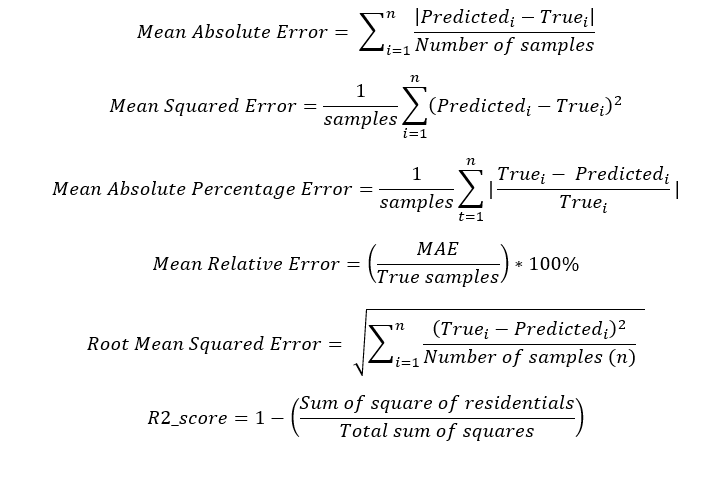

In [39]:
import matplotlib.pyplot as plt

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
from tensorflow.keras.metrics import MeanRelativeError, RootMeanSquaredError

In [53]:
## XGBoost Regressor
print("\t \t \t XGBoost Regressor Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_1)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_1)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_1)}')

m1_svm = MeanRelativeError(normalizer = y_valid)
m1_svm.update_state(y_valid,predictions_1)
print(f'\t \t Mean Relative Error (MRE) --: {m1_svm.result().numpy()}')

m2_svm = RootMeanSquaredError()
m2_svm.update_state(y_valid,predictions_1)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_svm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_1)}')

	 	 	 XGBoost Regressor Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 2.796202746457603
	 	 Mean Squared Error (MSE) --: 79.02776302825141
	 	 Mean absolute percentage error (MAPE) --: 2137691437940.138
	 	 Mean Relative Error (MRE) --: 0.029020562767982483
	 	 Root Mean Squared Error (RMSE) --: 8.889756202697754
	 	 R2 Score --: 0.996348542761855


In [54]:
## MLP Regressor
print("\t \t \t MLP Regressor Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_2)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_2)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_2)}')

m1_ada = MeanRelativeError(normalizer = y_valid)
m1_ada.update_state(y_valid,predictions_2)
print(f'\t \t Mean Relative Error (MRE) --: {m1_ada.result().numpy()}')

m2_ada = RootMeanSquaredError()
m2_ada.update_state(y_valid,predictions_2)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_ada.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_2)}')

	 	 	 MLP Regressor Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 1.652030524982927
	 	 Mean Squared Error (MSE) --: 24.431794771041062
	 	 Mean absolute percentage error (MAPE) --: 1103897907132.8716
	 	 Mean Relative Error (MRE) --: 0.019401349127292633
	 	 Root Mean Squared Error (RMSE) --: 4.942852973937988
	 	 R2 Score --: 0.9988711352765268


In [55]:
## LSTM Machines
print("\t \t \t LSTM Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_3)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_3)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_3)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_3)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_3)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_3)}')

	 	 	 LSTM Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 32.267802476924565
	 	 Mean Squared Error (MSE) --: 4816.243637865834
	 	 Mean absolute percentage error (MAPE) --: 42741155818244.94
	 	 Mean Relative Error (MRE) --: 0.7376695871353149
	 	 Root Mean Squared Error (RMSE) --: 69.39916229248047
	 	 R2 Score --: 0.7774667152622288


In [46]:
## LSTM with CNN Machines
print("\t \t \t LSTM with CNN Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_4)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_4)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_4)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_4)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_4)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_4)}')

	 	 	 LSTM with CNN Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 95.51507138437073
	 	 Mean Squared Error (MSE) --: 21729.36197290571
	 	 Mean absolute percentage error (MAPE) --: 1667479980580379.0
	 	 Mean Relative Error (MRE) --: 7.1326117515563965
	 	 Root Mean Squared Error (RMSE) --: 147.40882873535156
	 	 R2 Score --: -0.003999518851049544


In [57]:
## LSTM with RNN Machines
print("\t \t \t LSTM with RNN Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_5)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_5)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_5)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_5)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_5)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_5)}')

	 	 	 LSTM with RNN Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 58.10740063665998
	 	 Mean Squared Error (MSE) --: 18618.51662892887
	 	 Mean absolute percentage error (MAPE) --: 27008978117638.426
	 	 Mean Relative Error (MRE) --: 0.8357222676277161
	 	 Root Mean Squared Error (RMSE) --: 136.44969177246094
	 	 R2 Score --: 0.1397362812367392


In [58]:
## LSTM with RNN Machines
print("\t \t \t LSTM with Bi-directional RNN Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_6)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_6)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_6)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_6)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_6)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_6)}')

	 	 	 LSTM with Bi-directional RNN Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 21.791639006668003
	 	 Mean Squared Error (MSE) --: 3875.889055842669
	 	 Mean absolute percentage error (MAPE) --: 357194475636837.94
	 	 Mean Relative Error (MRE) --: 1.1644240617752075
	 	 Root Mean Squared Error (RMSE) --: 62.25664138793945
	 	 R2 Score --: 0.8209155541686749


In [59]:
## LSTM with RNN Machines
print("\t \t \t AdCNN Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_7)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_7)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_7)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_7)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_7)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_7)}')

	 	 	 AdCNN Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 23.733438412067084
	 	 Mean Squared Error (MSE) --: 5634.528705191715
	 	 Mean absolute percentage error (MAPE) --: 45576821430663.81
	 	 Mean Relative Error (MRE) --: 0.12192781269550323
	 	 Root Mean Squared Error (RMSE) --: 75.06349182128906
	 	 R2 Score --: 0.7396580665360222


In [60]:
## LSTM with RNN Machines
print("\t \t \t Time CNN LSTM Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_8)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_8)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_8)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_8)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')


m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_8)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_8)}')

	 	 	 Time CNN LSTM Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 14.056052743154003
	 	 Mean Squared Error (MSE) --: 2023.0394279840202
	 	 Mean absolute percentage error (MAPE) --: 59946656921141.41
	 	 Mean Relative Error (MRE) --: 0.24940720200538635
	 	 Root Mean Squared Error (RMSE) --: 44.978214263916016
	 	 R2 Score --: 0.9065259893573834


In [61]:
## LSTM with RNN Machines
print("\t \t \t Separable Conv Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_9)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_9)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_9)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_9)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_9)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_9)}')

	 	 	 Separable Conv Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 15.956963011913114
	 	 Mean Squared Error (MSE) --: 2377.5271799073107
	 	 Mean absolute percentage error (MAPE) --: 191819206627530.12
	 	 Mean Relative Error (MRE) --: 0.673586905002594
	 	 Root Mean Squared Error (RMSE) --: 48.759891510009766
	 	 R2 Score --: 0.8901469749706125


# Results Visualisation

In [63]:
import matplotlib.pyplot as plt

# Actual Value vs Predicted Value Graph

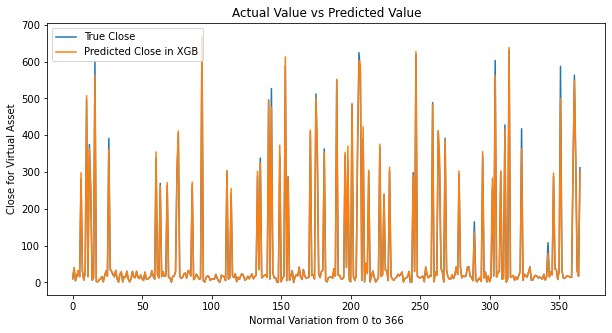

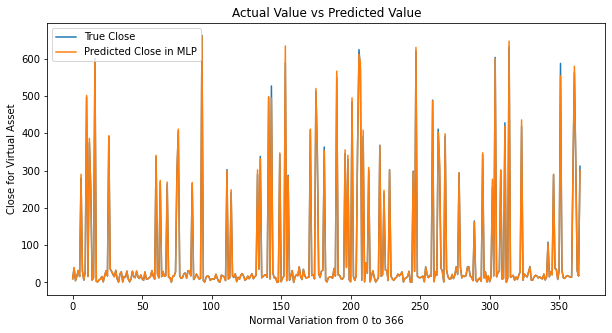

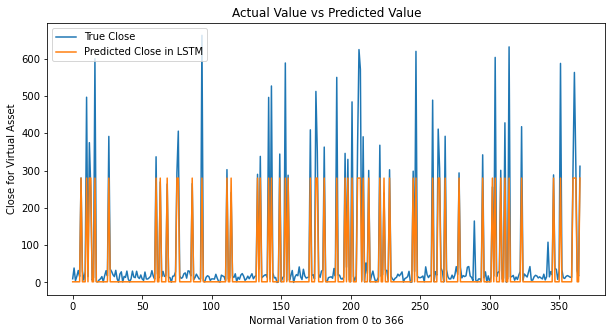

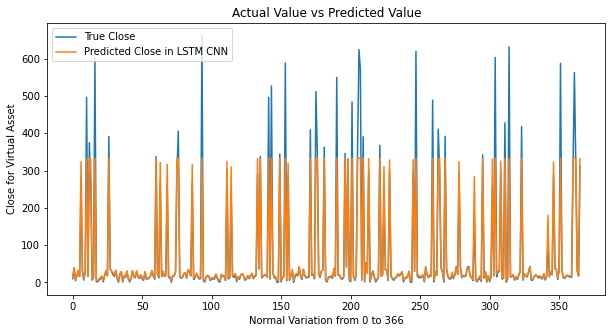

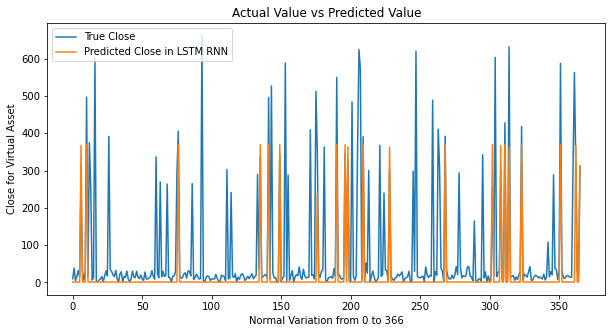

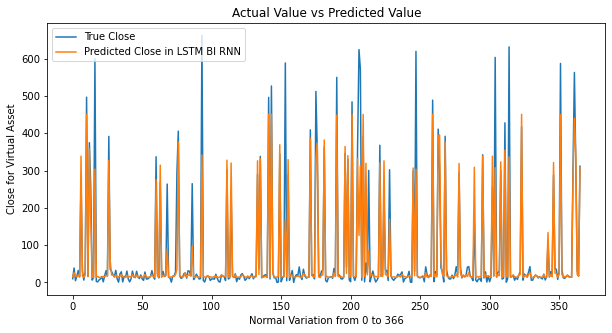

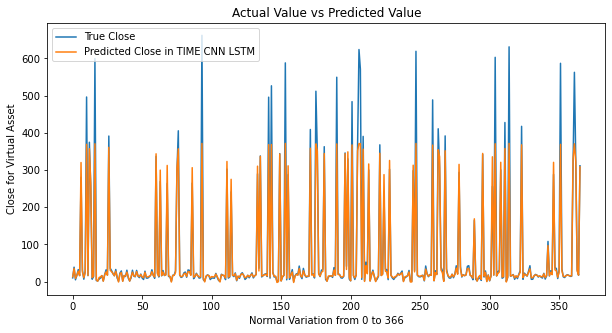

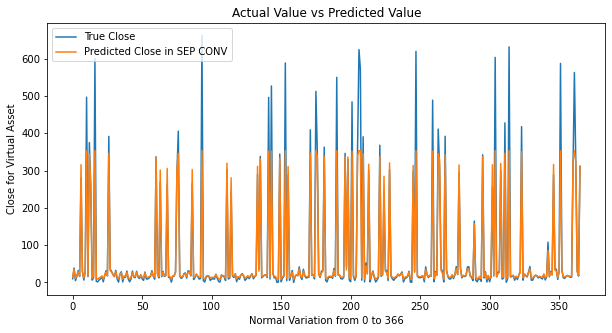

In [124]:
# 1. Actual value vs predicted value
def plot_reg_results(data,predicted_data, true_data):
    fig = plt.figure(facecolor='white', figsize=(10, 5))
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(true_data, 
            label='True Close')
    
    # plot flattened data
    ax.plot(predicted_data, 
             label=f'Predicted Close in {data}')
    
    plt.legend(loc = 'upper left')
    plt.xlabel(f'Normal Variation from 0 to {len(predicted_data)}')
    plt.ylabel("Close for Virtual Asset")
    plt.title("Actual Value vs Predicted Value")
    plt.show()

plot_reg_results("XGB",predictions_1,y_valid)
# plot_results("XGB",predictions_1,y_valid)
plot_reg_results("MLP",predictions_2,y_valid)
# plot_results("MLP",predictions_2,y_valid)
plot_reg_results("LSTM",predictions_3,y_valid)
plot_reg_results("LSTM CNN",predictions_4,y_valid)
plot_reg_results("LSTM RNN",predictions_5,y_valid)
plot_reg_results("LSTM BI RNN",predictions_6,y_valid)
# plot_reg_results("ADCNN",predictions_7,y_valid)
plot_reg_results("TIME CNN LSTM",predictions_8,y_valid)
plot_reg_results("SEP CONV",predictions_9,y_valid)
# plot_reg_results("GAUSSIAN",predictions_10[0:9],y_valid[0:9])

# Error Variation Parity Plot

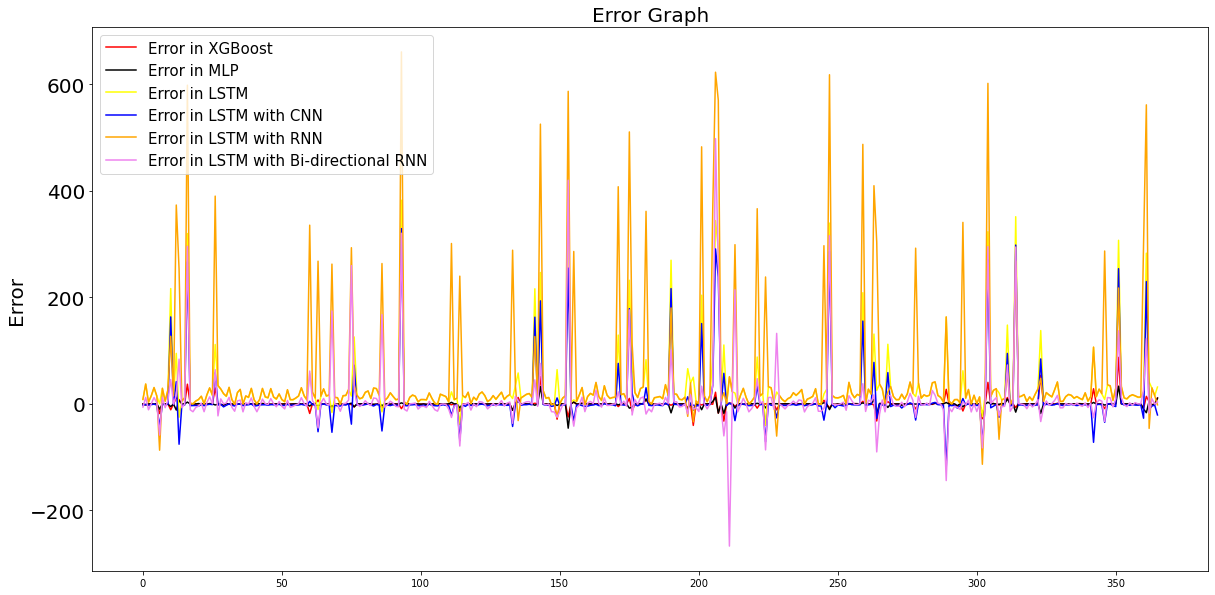

In [120]:
# 1. Actual value vs predicted value
def error_variation_graph_parity(error_1,error_2,error_3,error_4,error_5,error_6):
    fig = plt.figure(facecolor='white', figsize=(20, 10))
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(error_1, 
            label='Error in XGBoost',
            c='red')
    
    # plot flattened data
    ax.plot(error_2, 
             label='Error in MLP',
             c='black')
    
    ax.plot(error_3, 
             label='Error in LSTM',
             c='yellow')
    
    ax.plot(error_4, 
             label='Error in LSTM with CNN',
             c='blue')
    
    ax.plot(error_5, 
             label='Error in LSTM with RNN',
             c='orange')
    
    ax.plot(error_6, 
             label='Error in LSTM with Bi-directional RNN',
             c='violet')
    
    plt.legend(loc = 'upper left',fontsize= 15)
    plt.ylabel("Error",fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title("Error Graph",fontsize = 20)
    plt.show()

error_variation_graph_parity(y_valid-predictions_1,y_valid-predictions_2,y_valid-predictions_3,y_valid-predictions_4,y_valid-predictions_5,y_valid-predictions_6)

# Error Variation Graph - For each models

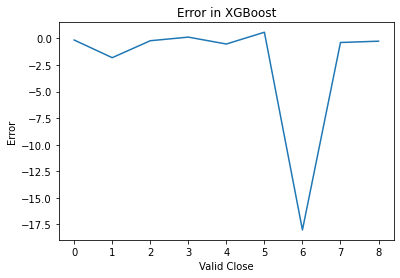

In [107]:
# 2. Error Variation Graph
def error_variation_graph(text,data):
    fig,ax = plt.subplots()
    ax = plt.plot(data)
    plt.title(f'Error in {text}')
    plt.xlabel("Valid Close")
    plt.ylabel("Error")
    plt.show()
error_variation_graph("XGBoost",y_valid[0:9]-predictions_1[0:9])

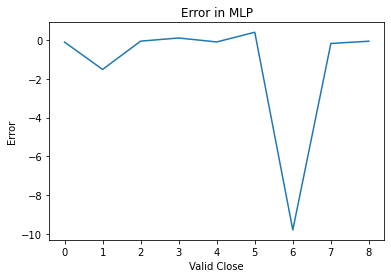

In [108]:
error_variation_graph("MLP",y_valid[0:9]-predictions_2[0:9])

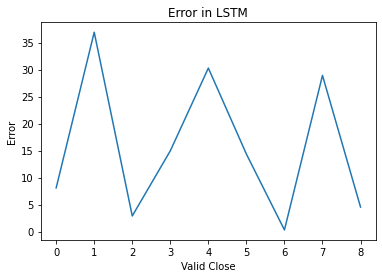

In [109]:
error_variation_graph("LSTM",y_valid[0:9]-predictions_3[0:9])

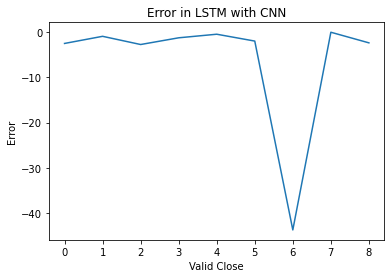

In [110]:
error_variation_graph("LSTM with CNN",y_valid[0:9]-predictions_4[0:9])

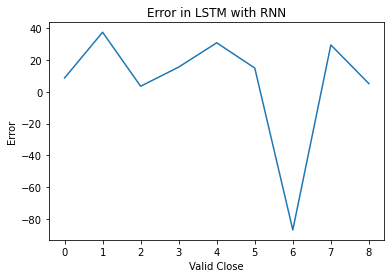

In [111]:
error_variation_graph("LSTM with RNN",y_valid[0:9]-predictions_5[0:9])

# Parity Plot for all the models used

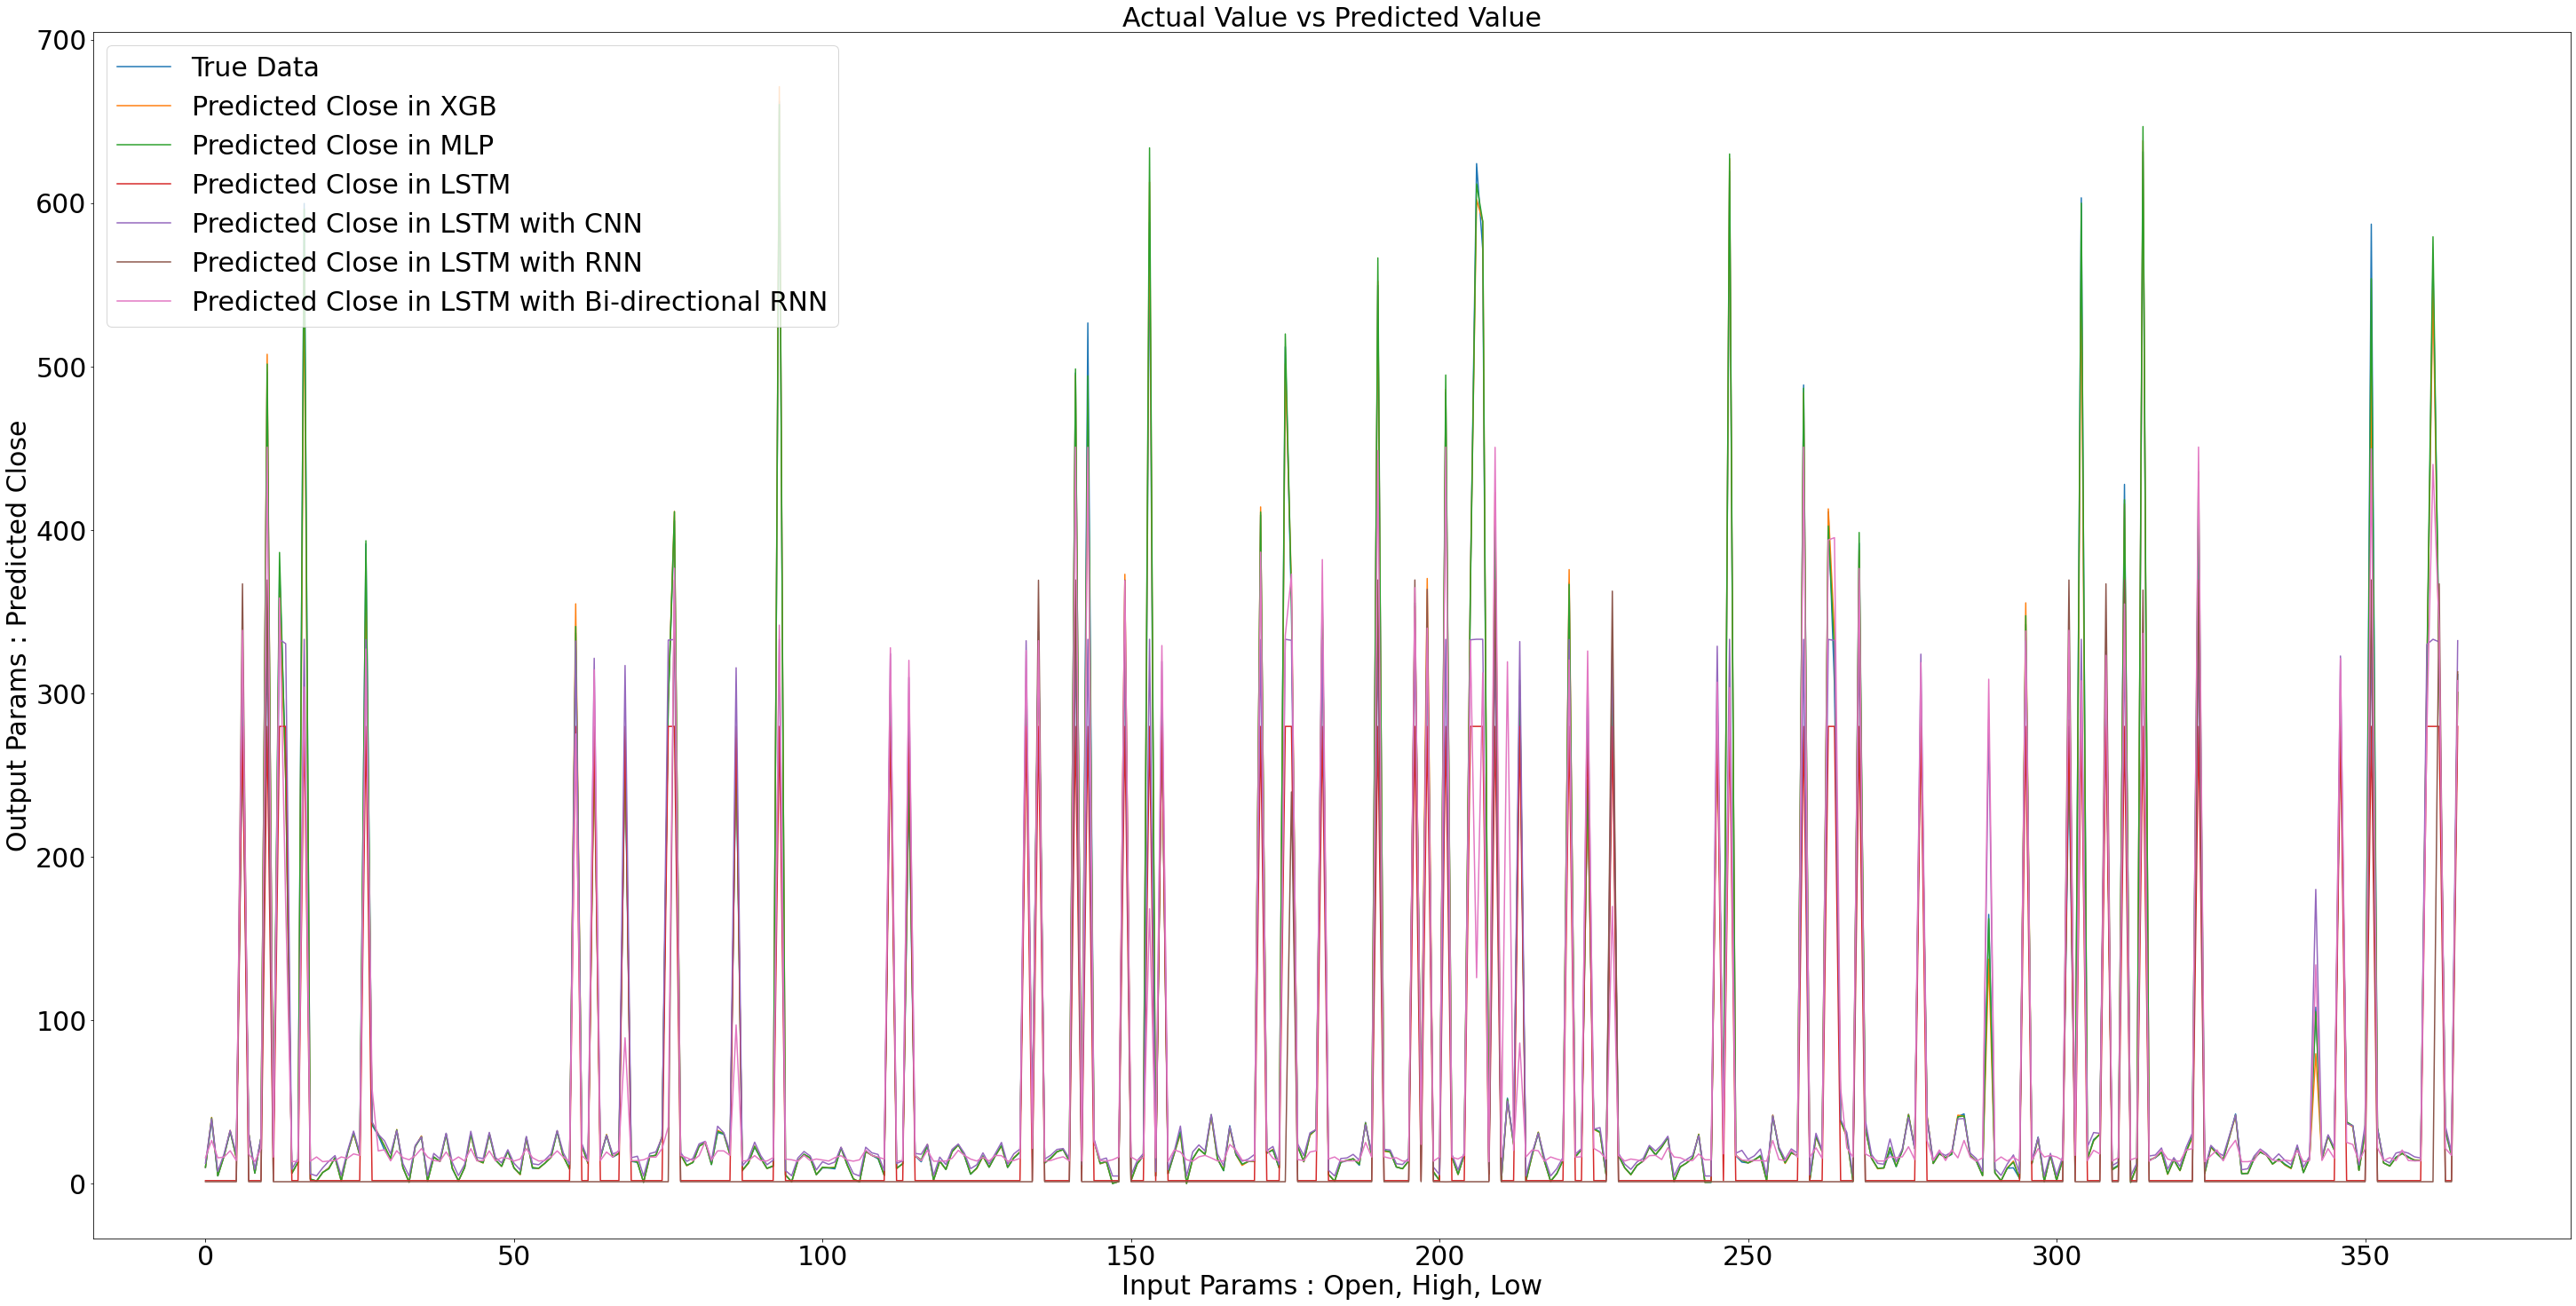

In [100]:
def plot_parity(predicted_data1,predicted_data2,predicted_data3,predicted_data4,predicted_data5,predicted_data6,true_data):
    fig = plt.figure(facecolor='white', figsize=(50, 25))
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(true_data, 
            label = "True Data")
    
    # plot flattened data
    ax.plot(predicted_data1, 
             label='Predicted Close in XGB')
    
    ax.plot(predicted_data2, 
             label='Predicted Close in MLP')
    ax.plot(predicted_data3, 
             label='Predicted Close in LSTM')
    ax.plot(predicted_data4, 
             label='Predicted Close in LSTM with CNN')
    ax.plot(predicted_data5, 
             label='Predicted Close in LSTM with RNN')
    ax.plot(predicted_data6, 
             label='Predicted Close in LSTM with Bi-directional RNN')
    
    plt.legend(loc = 'upper left',fontsize = 30)
    plt.xlabel("Input Params : Open, High, Low",fontsize = 30)
    plt.ylabel("Output Params : Predicted Close",fontsize = 30 )
    plt.xticks(fontsize= 30)
    plt.yticks(fontsize = 30)
    plt.title("Actual Value vs Predicted Value",fontsize = 30)
    plt.show()
plot_parity(predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6,y_valid)